In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns',None)
df=pd.read_csv(r'D:\Data Analytics\Python\Panda\Problem_Solving\ecommerce_clean.csv')

In [2]:
df.head(2)

,Unnamed: 0,index,order_id,order_date,delivered_date,customer_id,customer_name,customer_age,customer_gender,customer_segment,region,state,city,product_id,product_name,category,sub_category,brand,unit_price,quantity,discount_percentage,discount_amount,sales_amount,profit_margin,profit_amount,tax_rate,tax_amount,shipping_cost,shipping_method,total_amount,payment_method,delivery_time_days,order_status,rating,is_repeat_customer,order_year,order_month,order_quarter,order_day_of_week
0,0,0,ORD100722,2020-01-01,2020-01-04,CUST10257,Vikram Kumar,56,Female,Corporate,Central,Madhya Pradesh,Indore,PROD9221,Local Publishers Comics,Books,Comics,Local Publishers,495.34,1,10,49.53,445.80,0.448,199.71,0.12,53.50,56.65,Standard,555.95,Credit Card,3,Delivered,4.5,No,2020,1,Q1,Wednesday
1,1,1,ORD100766,2020-01-14,2020-01-15,CUST10171,Kavita Kumar,57,Male,Consumer,West,Gujarat,Vadodara,PROD6296,Oxford Self-Help,Books,Self-Help,Oxford,1313.37,4,0,0.00,5253.49,0.439,2306.35,0.12,630.42,125.12,Express,6009.03,Debit Card,1,Delivered,5.0,No,2020,1,Q1,Tuesday


### Create a line plot showing monthly sales trend (order_month) for the top 4 categories (by total sales). Use different colors/lines for each category.

In [31]:
top_category=df.groupby('category').agg(total_sale=('sales_amount','sum')).nlargest(n=4,columns='total_sale').reset_index()
top_category.category

top_category.category

0     Furniture
1       Kitchen
2    Home Decor
3      Clothing
Name: category, dtype: object

In [40]:
top4=df.groupby(['category','order_month']).agg(total_sale=('sales_amount','sum')).reset_index()
top4=top4[top4.category.isin(top_category.category)]
top4

,category,order_month,total_sale
12,Clothing,1,87778.43
13,Clothing,2,91695.36
14,Clothing,3,96137.42
15,Clothing,4,57418.85
16,Clothing,5,112346.14
17,Clothing,6,50711.75
18,Clothing,7,61640.81
19,Clothing,8,61499.42
20,Clothing,9,107910.24
21,Clothing,10,156783.31


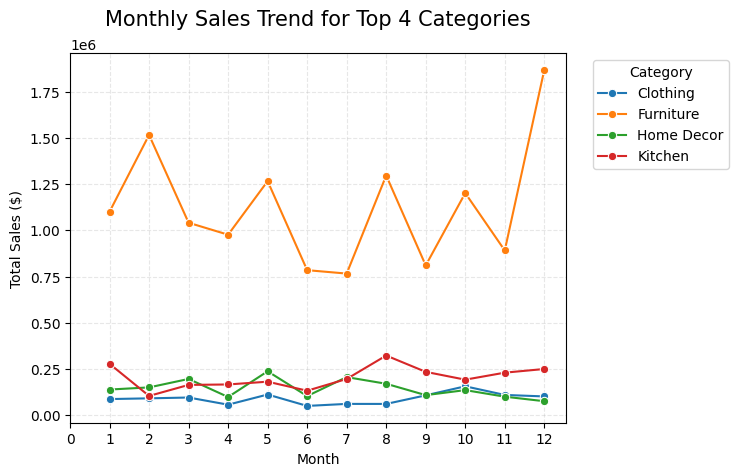

In [52]:
sns.lineplot(
    data=top4,
    x='order_month',
    y='total_sale',
    hue='category',
    marker='o'
)

plt.legend(
    title='Category',
    bbox_to_anchor=(1.04,1)
)

plt.title('Monthly Sales Trend for Top 4 Categories', fontsize=15, pad=20)
plt.ylabel('Total Sales ($)')
plt.xlabel('Month')
plt.xticks(range(0,13))
plt.grid(alpha=0.3,linestyle='--')
plt.show()